In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()

y = iris['target']
x = iris['data'][:,(2,3)]

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
from sklearn.tree import export_graphviz
image_path = "/home/xiaotongfeng/Desktop/Machine_Learning/chapter6_decision_tree/"
export_graphviz(
    tree_clf,
    out_file=image_path + "iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
# need install graphviz  from "http://www.graphviz.org/"
# run command 
# $ dot -Tpng iris_tree.dot -o xxx.png


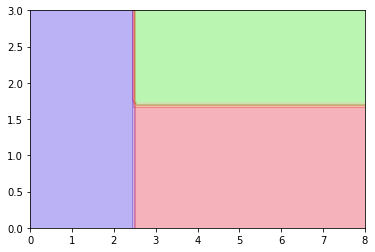

In [48]:
def TreePlotMap(clf,limit):
    x1 = np.linspace(limit[0][0],limit[0][1],num = 100)
    x2 = np.linspace(limit[1][0],limit[1][1],num = 100)
    x1s,x2s = np.meshgrid(x1,x2)
    y_pred = clf.predict(np.c_[x1s.ravel(),x2s.ravel()]).reshape(x1s.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.3)

    
TreePlotMap(tree_clf,[[0,8],[0,3]])

# CART 
# Classification And Regression Tree


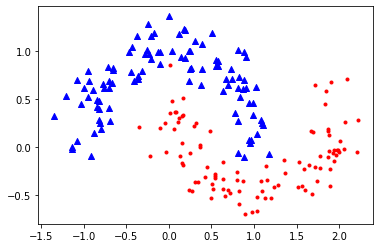

In [45]:
from sklearn.datasets import make_moons
x_m,y_m = make_moons(n_samples=200,noise=0.15,random_state=42)

def plotmoondata(x,y):
    for ii in range(len(y)):
        if y[ii] ==0 :
            plt.scatter(x[ii,0],x[ii,1],c ="blue",marker='^')
        else:
            plt.scatter(x[ii,0],x[ii,1],c ="red",marker='.')

plotmoondata(x_m,y_m)

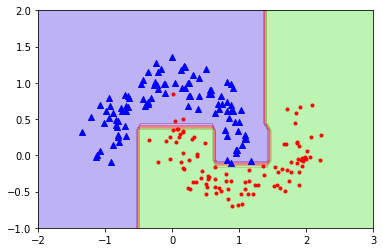

In [52]:
tree_new  = DecisionTreeClassifier()
tree_new.fit(x_m,y_m)
TreePlotMap(tree_new,[[-2,3],[-1,2]])
plotmoondata(x_m,y_m)
plt.show()

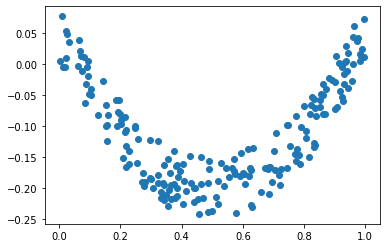

In [79]:
x_r = np.random.rand(200,1)
y_r = x_r ** 2 - x_r + np.random.rand(200,1)*0.1
plt.scatter(x_r,y_r)
#print(x_r)

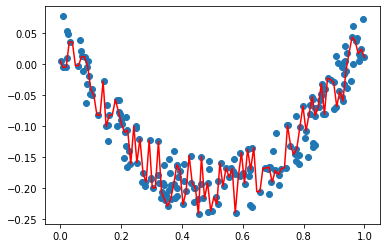

In [80]:
from sklearn.tree import DecisionTreeRegressor
tree_reg =DecisionTreeRegressor()
tree_reg.fit(x_r,y_r)

def TreePlotReg(reg,limit):
    x = np.linspace(limit[0],limit[1],num=100).reshape(-1, 1)
    #print(x)
    y_pred = reg.predict(x)
    plt.plot(x,y_pred,c="red")

TreePlotReg(tree_reg,[0,1])
plt.scatter(x_r,y_r)
plt.show()

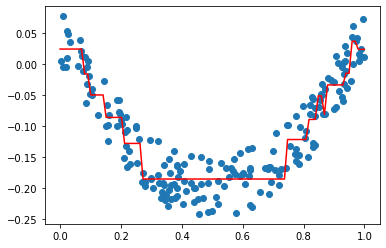

In [83]:
tree_reg1 =DecisionTreeRegressor(max_depth=4)
tree_reg1.fit(x_r,y_r)
TreePlotReg(tree_reg1,[0,1])
plt.scatter(x_r,y_r)
plt.show()

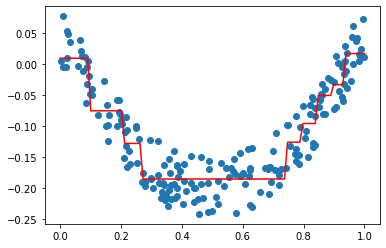

In [85]:
tree_reg2 =DecisionTreeRegressor(max_depth=4,min_samples_leaf= 10)
tree_reg2.fit(x_r,y_r)
TreePlotReg(tree_reg2,[0,1])
plt.scatter(x_r,y_r)
plt.show()